# Introduction to Scikit-Learn

## Scikit-Learn workflow

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [16]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Note: you may need to restart the kernel to use updated packages.


In [20]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
X = car_sales.drop("Price", axis=1)
X["Make"].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [22]:
y = car_sales["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [25]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [27]:
#Re-fit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [28]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
#Fill the columns
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_3712\365453917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_3712\365453917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [31]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [32]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [33]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

In [34]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [35]:
car_sales_missing.dropna(subset="Price", inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [36]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:
#Fill missing value whit sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [38]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [39]:
car_sales_filled["Make"].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan', 'missing'], dtype=object)

In [40]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [44]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
from sklearn.linear_model import Ridge

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5758549611440127

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for x in range(10, 110, 10):
    model = RandomForestRegressor(n_estimators=x)
    model.fit(X_train, y_train)
    print("n_estimator = ", x, " score: ")
    print(model.score(X_test, y_test))

n_estimator =  10  score: 
0.7861683250125951
n_estimator =  20  score: 
0.7921703487543733
n_estimator =  30  score: 
0.8033088116105884
n_estimator =  40  score: 
0.8040797757007266
n_estimator =  50  score: 
0.8031461716482646
n_estimator =  60  score: 
0.8051388220717626
n_estimator =  70  score: 
0.807408426217255
n_estimator =  80  score: 
0.8057237574398309
n_estimator =  90  score: 
0.805355219321783
n_estimator =  100  score: 
0.8058201746239688


In [45]:
heart_disease = pd.read_csv("heart-disease.csv")

In [46]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7695473251028807

In [48]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
y_pred = model.predict(X_test)

In [50]:
np.mean(y_pred == y_test)

0.7695473251028807

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7695473251028807

In [52]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1], dtype=int64)

In [53]:
model.predict_proba(X_test[:5])

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [54]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
260    0
199    0
14     1
47     1
94     1
Name: target, Length: 243, dtype: int64

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.80327869, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [56]:
model_single_score = model.score(X_test, y_test)

In [57]:
cross_validation_score = np.mean(cross_val_score(model, X, y))
model_single_score, cross_validation_score

(0.7695473251028807, 0.8183060109289617)

** Area under the reciever operating characteristic curve (AUC/ROC) **


In [58]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)

y_probs[:10]

array([[0.08, 0.92],
       [0.81, 0.19],
       [0.27, 0.73],
       [0.82, 0.18],
       [0.01, 0.99],
       [0.17, 0.83],
       [0.4 , 0.6 ],
       [0.33, 0.67],
       [0.06, 0.94],
       [0.51, 0.49]])

In [59]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.92, 0.19, 0.73, 0.18, 0.99, 0.83, 0.6 , 0.67, 0.94, 0.49])

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.03571429, 0.07142857, 0.07142857, 0.14285714, 0.21428571,
       0.21428571, 0.28571429, 0.32142857, 0.35714286, 0.42857143,
       0.53571429, 0.64285714, 0.67857143, 0.82142857, 0.92857143,
       1.        ])

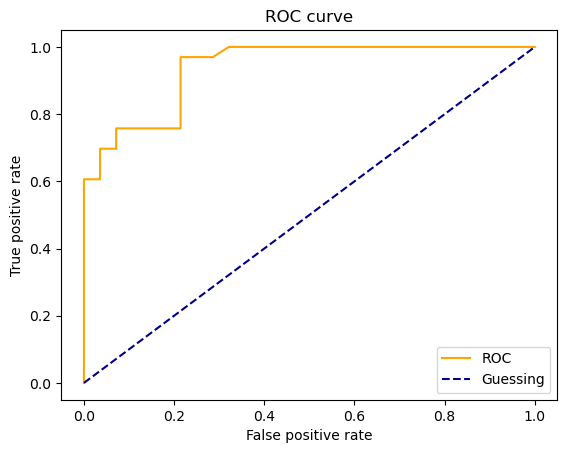

In [61]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr (False positive rate) and tpr (True positive rate) of a model
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9377705627705628

**Confusion Matrix**

In [63]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  6],
       [ 7, 26]], dtype=int64)

In [64]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual label"],
            colnames=["predicted labels"])

predicted labels,0,1
Actual label,,
0,22,6
1,7,26


In [65]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\filip\Desktop\DataScience-Tut\Matplot_course\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py312haa95532_0         556 KB
    ------------------------------------------------------------
                                           Total:         556 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py312haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


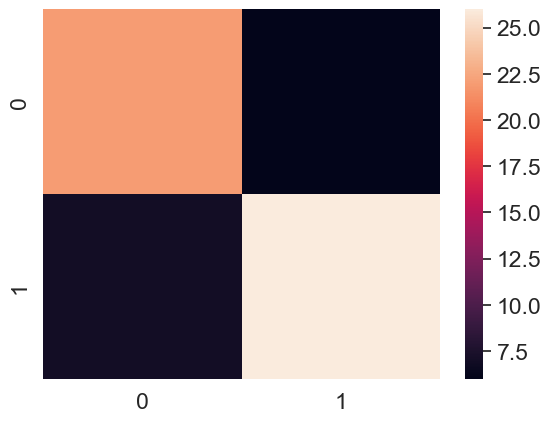

In [66]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

In [67]:
import sklearn
sklearn.__version__

'1.5.0'

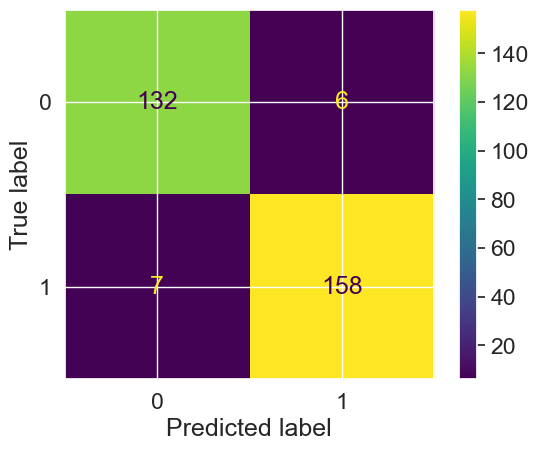

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);

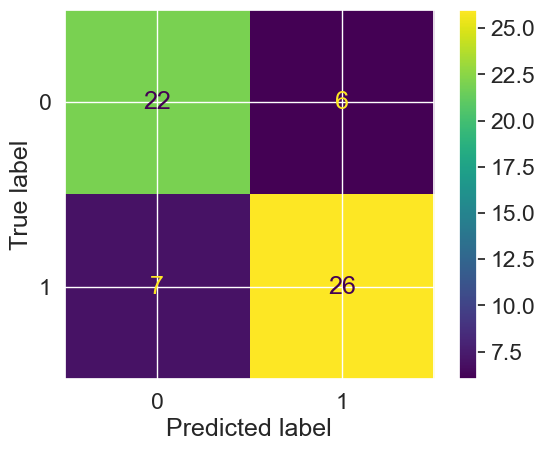

In [69]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred= y_preds)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.\\

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.\\

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.\\

Support - The number of samples each metric was calculated on.\\

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.\\

Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.\\

Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

### Evaluation a Regression model
- R^2 Coefficent of determination
- MAE Mean Absolute Error
- MSE Mean Square Error

In [73]:
from sklearn.ensemble import RandomForestRegressor

X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.799049964167685

In [74]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.08135684, 2.08135684, 2.08135684, 2.08135684, 2.08135684,
       2.08135684, 2.08135684, 2.08135684, 2.08135684, 2.08135684])

In [75]:
r2_score(y_true=y_test,
         y_pred = y_test_mean)

0.0

In [76]:
r2_score(y_true=y_test,
         y_pred = y_test)

1.0

In [77]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3327620500000002

In [78]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]

df.head()

,actual values,predicted values,differences
6380,2.65700,3.26247,6.054705e-01
5256,5.00001,5.00001,-1.065814e-14
2204,0.88900,2.07864,1.189640e+00
18982,1.39700,1.61566,2.186600e-01
14147,1.35100,1.24680,-1.042000e-01
